# 01.Polytropes

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from numpy import array, pi

#### Student-report part 1:
Solve the Lane-Emden equation for $n=1.0$, $1.5$, $2.0$, $2.5$, $3.0$ and $3.5$, compute the dimensionless parameters $D_n$, $M_n$, $R_n$ and $B_n$ (see summary above) and put them in a table in your report. What is the value of $M_3$?

| n | D | M | R | B |
| ---: | :---: | :---: | :--- | :---  |
| $1.0$ | $3.29$ | $3.14$ | $3.14$ | $1.93e+02$ | 
| $1.5$ | $5.99$ | $2.71$ | $3.65$ | $7.67e+04$ | 
| $2.0$ | $11.4$ | $2.41$ | $4.35$ | $2.64e+06$ |
| $2.5$ | $23.4$ | $2.19$ | $5.35$ | $5.35e+05$ | 
| $3.0$ | $54.2$ | $2.02$ | $6.90$ | $1.71e+01$ | 
| $3.5$ | $153.0$ | $1.89$ | $9.54$ | $4.00e-10$ |

- $M_3$ is 2.02

In [4]:
# polytopic indices
ns=np.arange(1.0, 4.0, 0.5)
ns.any()
nt = np.array([1.0,1.5,2.0,2.5,3.0,3.5])
# Your solution here

def polx(n, h=1e-3, x_max=20.0):
    xi = 1e-7
    yi = 1
    zi = 0
    
    x = []
    y = []
    z = []
    
    while yi>=0 and xi<=x_max:
        # compute Euler step for next point
        #np.logical_and(x > -2, x < 2)
        # Your integration goes here!
        #
        xj = xi+h
        yj = yi+(zi*h)
        zj = zi+((-2*zi/xi)-yi**n)*h
        
        # add point to output array
        x.append(xj)
        y.append(yj)
        z.append(zj)
        
        # set new points to old points for next step
        xi = xj
        yi = yj
        zi = zj
        
        # get surface properties(linear interpolation)
        ysurf = 0.0
        xsurf = x[-1]
        zsurf = z[-1]
        
    return (xsurf)
    
    
    

def polz(n, h=1e-3, x_max=20.0):
    xi = 1e-7
    yi = 1
    zi = 0
    
    x = []
    y = []
    z = []
    while yi>=0 and xi<=x_max:
        # compute Euler step for next point
        #
        # Your integration goes here!
        #
        xj = xi+h
        yj = yi+(zi*h)
        zj = zi+((-2*zi/xi)-yi**n)*h
        
        # add point to output array
        x.append(xj)
        y.append(yj)
        z.append(zj)
        
        # set new points to old points for next step
        xi = xj
        yi = yj
        zi = zj
        
        # get surface properties(linear interpolation)
        ysurf = 0.0
        xsurf = x[-1]
        zsurf = z[-1]
        
    return (zsurf)


In [9]:
### Define polytropic quantities Dn, Mn, 

def Dn(n,polx,polz):
    dn= -((3/polx(n))*polz(n))**(-1)
    return dn
D1,D15,D2,D25,D3,D35= Dn(1.0,polx,polz),Dn(1.5,polx,polz),\
Dn(2,polx,polz),Dn(2.5,polx,polz),Dn(3,polx,polz),Dn(3.5,polx,polz)
D=array([D1,D15,D2,D25,D3,D35])

#########

def Mn(n,polx,polz):
    mn= -(polx(n)**2)*polz(n)
    return mn

M1,M15,M2,M25,M3,M35= Mn(1.0,polx,polz),Mn(1.5,polx,polz),Mn(2,polx,polz),\
Mn(2.5,polx,polz),Mn(3,polx,polz),Mn(3.5,polx,polz)
M=array([M1,M15,M2,M25,M3,M35])

##########

R1,R15,R2,R25,R3,R35 = polx(1.0),polx(1.5),polx(2.0),polx(2.5),\
polx(3.0),polx(3.5)
R = array([R1,R15,R2,R25,R3,R35])

#########

def Bn(n,mn,rn,dn):
    bn = 3**(1/n)/(n+1)*mn**(1-n/n)*rn**(n-3/n)*dn**((3-n)*3*n)
    return bn
N = array([1.0,1.5,2.0,2.5,3.0,3.5])
B = Bn(N,M,R,D)

#### Student-report part 2:
Use the tabulated values of $R_n$ and $M_n$ of a $n=1.5$ polytrope and the constant $K$ from electron degeneracy pressure to plot the mass-radius relation of white dwarfs for masses $0.01\text{--}2.0\,\mathrm{M}_\odot$. Has a more massive white dwarf a smaller or a larger radius than a less massive white dwarf? 

*Hint:* The Python package `scipy.constants` has many natural [constants](https://docs.scipy.org/doc/scipy/reference/constants.html) in SI units. However, it does not provide commonly-used astronomical constants. For example, loading the module via `import scipy.constants as const`, you can access Planck's constant via `const.h`.

- More massive white dwarf has smaller radius 

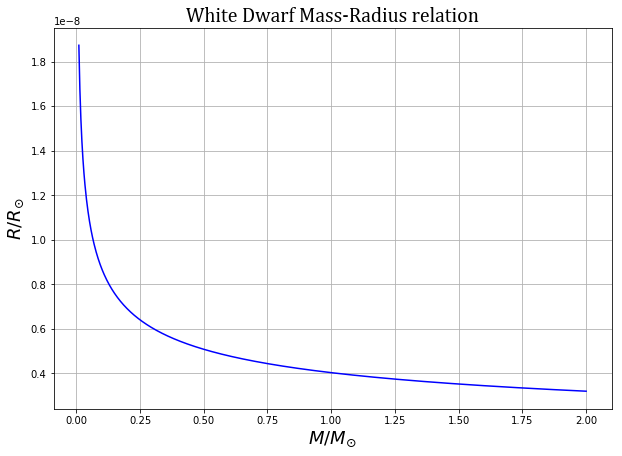

In [7]:
import scipy.constants as const

M_sun = 1.98847542e30 # in kg
R_sun = 695700000.0 # in m

Mwd = np.linspace(0.01, 2.0, 1000) # a useful range of WD masses

mu = 1.6605390666e-27 #in kg
Rwd = R15*((1/(4*pi))**(1/(1.5)))*(2.5/const.G)*(M15/(Mwd*M_sun))**(0.5/1.5)/R_sun

# Your solution here
bsfont = {'fontname':'Cambria Math'}
plt.figure(figsize=(10,7))
plt.plot(Mwd,Rwd,c='blue')
plt.xlabel(r'$M/M_{\odot}$',fontsize=18,**bsfont)
plt.ylabel(r'$R/R_{\odot}$',fontsize=18,**bsfont)
plt.title('White Dwarf Mass-Radius relation',fontsize=20,**bsfont)
plt.grid()

#### Student-report part 3:
Use the tabulated value $M_3$ and the polytropic constant $K$ from above to show that the Chandrasekhar mass is $M_\mathrm{Ch}\approx5.83\,\mu_\mathrm{e}^{-2}\,\mathrm{M}_\odot$. Compute the Chandrasekhar mass for a white dwarf made of carbon and oxygen, and of a white dwarf made of iron. The latter mass limit is relevant for core-collapse supernovae as we will see later in this course. For which composition do we have $\mu_\mathrm{e}=1.0$ and hence a Chandrasekhar mass of $5.83\,\mathrm{M}_\odot$?

Solution: 

(a) for a degenerate non-relativistic electron gas, $R \propto M^{-1/3}$. Combining it with $\rho \propto MR^{-3}$ we obtain $\bar \rho \propto M^2$

(b) The mean density increases and electrons become relativistic due to Pauli exclusion principle 

(c) For n=3, the mass-radius relation becomes:

 $M = 4\pi M_{3}\left(\frac{K}{\pi G}\right)^{3/2}$
 
 plugging in $M_{3}=2.02$ 
 
(d) the general equation for $\mu_e$ is:

\begin{equation}
    \mu_e = \left(\sum_{i}\frac{X_i Z_i}{A_i}\right)^{-1}
\end{equation}

where A is the molecular weight and Z is the charge. For Hydrogen, $\mu_e = 1$, for Oxygen, Helium, and Carbon $\mu_e = 2$, and for iron $\mu_e = 56/26$

The resulting Chandrasekhar masses $M_\mathrm{Ch}$ are:

(e) $\mu_e = 1$ is valid for Hydrogen composition since $A/Z=1$